In [1]:
import numpy as np
import cupy as cp
import importlib
import pandas as pd

In [18]:
def init_weight_bias(M1, M2 = 1, usecupy = False) :
    if usecupy :
        module = importlib.import_module('cupy')
    else :
        module = importlib.import_module('numpy')
    W = module.random.randn(M1, M2)/ module.sqrt(M1 + M2)
    b = module.random.randn(M2) / module.sqrt(M2)
    if M2 == 1 :
        W = W.reshape(M1)
        b = b[0]
    return W, b

def relu(x) :
    return x * (x > 0)

def sigmoid(z, usecupy = False):
    if usecupy :
        module = importlib.import_module('cupy')
    else :
        module = importlib.import_module('numpy')
    return 1 / 1 + module.exp(-z)

def softmax(a, usecupy = False) :
    if usecupy :
        module = importlib.import_module('cupy')
    else :
        module = importlib.import_module('numpy')
    aExp = module.exp(a)
    return aExp / aExp.sum(axis = 1, keepdims = True)

def bin_cross_entropy(T, Y, usecupy = False):  #for binary classification
    if usecupy :
        module = importlib.import_module('cupy')
    else :
        module = importlib.import_module('numpy')
    return -module.sum(T *module.log(Y) + (1 - T) * module.log(1 - Y))

def bin_cross_entropy(T, Y, usecupy = False):  #for binary classification
    if usecupy :
        module = importlib.import_module('cupy')
    else :
        module = importlib.import_module('numpy')
    return -module.sum(T *module.log(Y) + (1 - T) * module.log(1 - Y))

def cost(T, Y, usecupy = False) :
    if usecupy :
        module = importlib.import_module('cupy')
    else :
        module = importlib.import_module('numpy')
    return -(T * module.log(Y)).sum()

def cost_mean(T, Y, usecupy = False) :
    if usecupy :
        module = importlib.import_module('cupy')
    else :
        module = importlib.import_module('numpy')
    return -(T * module.log(Y)).mean()

def cost2(T, Y, usecupy = False) :
    if usecupy :
        module = importlib.import_module('cupy')
    else :
        module = importlib.import_module('numpy')
    #we do this to avoid multiplying a huge matrix of T with mostly zeros+
    N = len(T)
    return -module.log(Y[module.arange(N), T]).sum()

def error_rate(targets, predictions) : #opposite of classification rate
    return (targets != predictions).mean()

def classification_rate(T, Y) :
    return (T == Y).mean()

def to_indicator(Yin, K, usecupy = False) :
    if usecupy :
        module = importlib.import_module('cupy')
    else :
        module = importlib.import_module('numpy')
    N = len(Yin)
    Yout = module.zeros((N, K))
    for i in range(N):
        Yout[i][Yin[i]] = 1
        
    return Yout

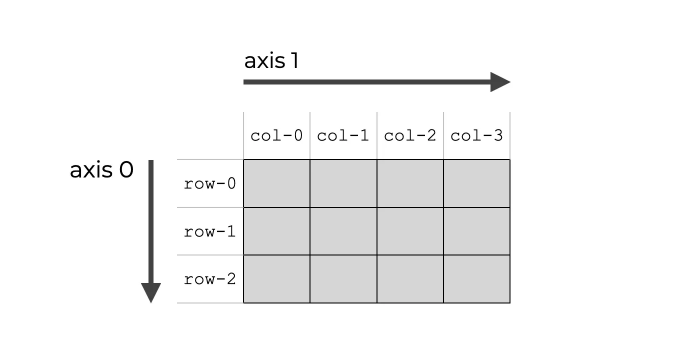

In [34]:
fcn_to_call = 'random'
mod = __import__('cupy')
func = getattr(mod, fcn_to_call)
func.randn()

array(-0.30029148)

In [41]:
x = np.random.randn(100,2)
y = cp.array(x)

In [54]:
type(softmax(y))

cupy.ndarray

In [15]:
np.random.randn(1)[0]

-0.9051673702474293